# Train VAE & classifier 

In [1]:
import os
from cell_cycle_classification.utils.model_trainer import ModelTrainer
from cell_cycle_classification.utils.model_params import FucciVAEModelParams
from cell_cycle_classification.utils.parser import FucciVAEParser

### Define parameters

In [2]:
params = FucciVAEModelParams()
args = FucciVAEParser().get_default_args()

### Define model trainer

In [3]:
trainer = ModelTrainer()

# Next is specific to our data set - modify with your own data set if necessary
params.train_file = os.path.join(os.path.abspath(''), "data_set_split", "train.txt")
params.val_file = os.path.join(os.path.abspath(''), "data_set_split", "val.txt")
params.test_file = os.path.join(os.path.abspath(''), "data_set_split", "test.txt")
params.data_set_size = 280  # maximum nucleus diameter 

### VAE - SSL training

In [4]:
trainer.ssl_train(args, params);


### Training VAE on current data set ###

Model time id: 20250108-110733-local
epochs 10 | batch 32 | lr 0.0001 | weight decay 0.05 | dropout 0.0 | c [0] | z [0, 1, 2, 3, 4] | data set size 280 | latent dim 256 | beta 0.01 | gamma 100.0 | delta 10000.0 | depth 5 | kld loss standard | encoder name resnet18 | latent dim 256 | beta 0.01 | gamma 100.0 | delta 10000.0 | C 50 | depth 5 | kld loss standard | encoder name resnet18
File names correctly loaded.
Splitting file names ...
### Data source ###
train data is loaded from c:\Users\thoma\cell_cycle_classification\notebooks\data_set_split\train.txt - 100% elements
val data is loaded from c:\Users\thoma\cell_cycle_classification\notebooks\data_set_split\val.txt - 100% elements
test data is loaded from c:\Users\thoma\cell_cycle_classification\notebooks\data_set_split\test.txt - 100% elements
###################
train has 752 images.
val has 323 images.
test has 388 images.
###################
Note: test is shuffled for EuclideanMetricMatch

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: thomas-bonte (cbio-bis). Use `wandb login --relogin` to force relogin


Checking train dataset...
Checking eval dataset...
Using Custom Trainer

Model passed sanity check !
Ready for training.

Created c:\users\thoma\cell_cycle_classification\cell_cycle_classification\utils\..\..\models/fucci_vae/20250108-110733-local\VAMP_training_2025-01-08_11-08-39. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 10
 - per_device_train_batch_size: 32
 - per_device_eval_batch_size: 32
 - checkpoint saving every: None
Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.91, 0.995)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.0001
    maximize: False
    weight_decay: 0.05
)
Scheduler: <torch.optim.lr_scheduler.ReduceLROnPlateau object at 0x0000027A86AFC940>

Successfully launched training !



Training of epoch 1/10:   0%|          | 0/24 [00:00<?, ?batch/s]

Eval of epoch 1/10:   0%|          | 0/11 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 2274.7884
Eval loss: 860.3397
--------------------------------------------------------------------------


Training of epoch 2/10:   0%|          | 0/24 [00:00<?, ?batch/s]

Eval of epoch 2/10:   0%|          | 0/11 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 905.2321
Eval loss: 678.554
--------------------------------------------------------------------------


Training of epoch 3/10:   0%|          | 0/24 [00:00<?, ?batch/s]

Eval of epoch 3/10:   0%|          | 0/11 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 687.0939
Eval loss: 492.4587
--------------------------------------------------------------------------


Training of epoch 4/10:   0%|          | 0/24 [00:00<?, ?batch/s]

Eval of epoch 4/10:   0%|          | 0/11 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 575.1616
Eval loss: 398.9034
--------------------------------------------------------------------------


Training of epoch 5/10:   0%|          | 0/24 [00:00<?, ?batch/s]

Eval of epoch 5/10:   0%|          | 0/11 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 500.6131
Eval loss: 435.879
--------------------------------------------------------------------------


Training of epoch 6/10:   0%|          | 0/24 [00:00<?, ?batch/s]

Eval of epoch 6/10:   0%|          | 0/11 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 450.0462
Eval loss: 406.1995
--------------------------------------------------------------------------


Training of epoch 7/10:   0%|          | 0/24 [00:00<?, ?batch/s]

Eval of epoch 7/10:   0%|          | 0/11 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 380.7597
Eval loss: 348.6797
--------------------------------------------------------------------------


Training of epoch 8/10:   0%|          | 0/24 [00:00<?, ?batch/s]

Eval of epoch 8/10:   0%|          | 0/11 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 354.6392
Eval loss: 331.8496
--------------------------------------------------------------------------


Training of epoch 9/10:   0%|          | 0/24 [00:00<?, ?batch/s]

Eval of epoch 9/10:   0%|          | 0/11 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 329.5012
Eval loss: 300.5547
--------------------------------------------------------------------------


Training of epoch 10/10:   0%|          | 0/24 [00:00<?, ?batch/s]

Eval of epoch 10/10:   0%|          | 0/11 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 312.5759
Eval loss: 279.0892
--------------------------------------------------------------------------
Training ended!
Saved final model in c:\users\thoma\cell_cycle_classification\cell_cycle_classification\utils\..\..\models/fucci_vae/20250108-110733-local\VAMP_training_2025-01-08_11-08-39\final_model


additional/eval_epoch_adjacent_loss,█▅▅▃▂▁▂▂▂▂
additional/eval_epoch_inactive_dim_loss,▂▁▅▂▄▅█▅▃▄
additional/eval_epoch_prediction_loss,█▆▄▃▄▄▂▂▁▁
additional/eval_epoch_recon_loss,█▅▂▂▂▂▂▁▁▁
additional/eval_epoch_reg_loss,▅▁▁▄▄▃▄█▇█
additional/train_epoch_adjacent_loss,█▆▄▃▂▂▂▁▁▁
additional/train_epoch_inactive_dim_loss,▁▁▁▁▁▁▁▁▁▁
additional/train_epoch_prediction_loss,█▄▃▃▂▂▁▁▁▁
additional/train_epoch_recon_loss,█▂▁▁▁▁▁▁▁▁
additional/train_epoch_reg_loss,▁▁▂▃▄▅▆▆▇█
eval/epoch_loss,█▆▄▂▃▃▂▂▁▁


Model evaluation in progress: 100.0% | Batch #12                                                   
Average SSIM: 0.46
Model evaluation in progress: 100.0% | Batch #12                                                   
Average EuclideanMatchingMetric: 0.572


Model time id: 20250108-113344-local
epochs 1 | batch 64 | lr 0.0001 | weight decay 0.05 | dropout 0.0 | c [0] | z [0, 1, 2, 3, 4] | data set size 280 | latent dim 256 | beta 0.01 | gamma 1 | delta 10000.0 | depth 5 | kld loss standard | encoder name resnet18 | latent dim 256 | beta 0.01 | gamma 1 | delta 10000.0 | C 50 | depth 5 | kld loss standard | encoder name resnet18


### Classification ###

File names correctly loaded.
Splitting file names ...
### Data source ###
train data is loaded from c:\Users\thoma\cell_cycle_classification\notebooks\data_set_split\train.txt - 100% elements
val data is loaded from c:\Users\thoma\cell_cycle_classification\notebooks\data_set_split\val.txt - 100% elements
test data is loaded from c:\Users\thoma\cell_cycle_classification\notebooks\data_set_split\test.txt - 100% elements
###################
train has 171 images for class 0, 347 images for class 1, 234 images for class 2, total 752 images (oversampling applied)
val has 62 images for class 0, 177

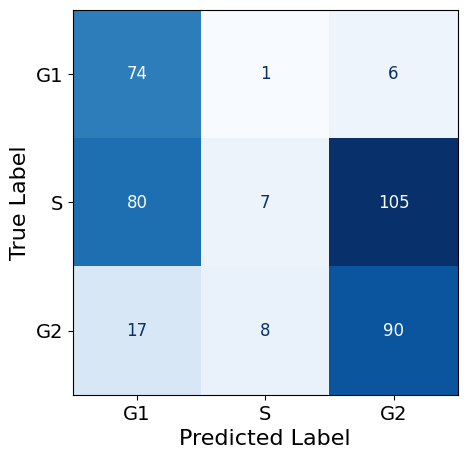

In [5]:
# NB: as this notebook is only for demo, it is trained with very few images. 
# Consequently, classification results are not as good as they are in the paper.

params.reset_training_folders()  # necessary since model folder is not defined from args but in params directly
trainer.classification_train(args, params);